In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/content/stud.csv")

In [4]:
data.shape

(1000, 8)

In [5]:
#data checks to perform


In [6]:
data.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.nunique()

,0
gender,2
race_ethnicity,5
parental_level_of_education,6
lunch,2
test_preparation_course,2
math_score,81
reading_score,72
writing_score,77


In [10]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
 #explore data
cat_col= data.select_dtypes(include='object')

In [12]:
for col in cat_col:
  print(f"\nCategories in {col} variable : ")
  print(data[col].unique())
  print(f"\nFrequency of Categories in {col} variable : ",end=" ")
  print(data[col].nunique())
  print("-"*10)


Categories in gender variable : 
['female' 'male']

Frequency of Categories in gender variable :  2
----------

Categories in race_ethnicity variable : 
['group B' 'group C' 'group A' 'group D' 'group E']

Frequency of Categories in race_ethnicity variable :  5
----------

Categories in parental_level_of_education variable : 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Frequency of Categories in parental_level_of_education variable :  6
----------

Categories in lunch variable : 
['standard' 'free/reduced']

Frequency of Categories in lunch variable :  2
----------

Categories in test_preparation_course variable : 
['none' 'completed']

Frequency of Categories in test_preparation_course variable :  2
----------


In [13]:
categorical_columns = [feature for feature in data.columns if data[feature].dtype == 'O']
numerical_columns = [feature for feature in data.columns if data[feature].dtype != 'O']

In [14]:
print("we have {} Categorical Columns :{}".format(len(categorical_columns),categorical_columns))
print("we have {} Numerical Columns : {}".format(len(numerical_columns),numerical_columns))

we have 5 Categorical Columns :['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
we have 3 Numerical Columns : ['math_score', 'reading_score', 'writing_score']


In [15]:
#adding column for total score and average score
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
data["Total_score"]=data[numerical_columns].sum(axis=1)
data["Average_score"] = data["Total_score"]/3

In [17]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [18]:
#calculating full marks in subjects
for col in numerical_columns:
  score=data[data[col]==100]['Average_score'].count()
  print(f"\nNumber of Students scored full marks in {col} is {score}")
  print("-"*15)


Number of Students scored full marks in math_score is 7
---------------

Number of Students scored full marks in reading_score is 17
---------------

Number of Students scored full marks in writing_score is 14
---------------


In [19]:
for col in numerical_columns:
  score=data[data[col]<=20]['Average_score'].count()
  print(f"\nNumber of Students less than 20 marks in {col} is {score}")
  print("-"*15)


Number of Students less than 20 marks in math_score is 4
---------------

Number of Students less than 20 marks in reading_score is 1
---------------

Number of Students less than 20 marks in writing_score is 3
---------------


In [20]:
#students performed worst in math and best in reading

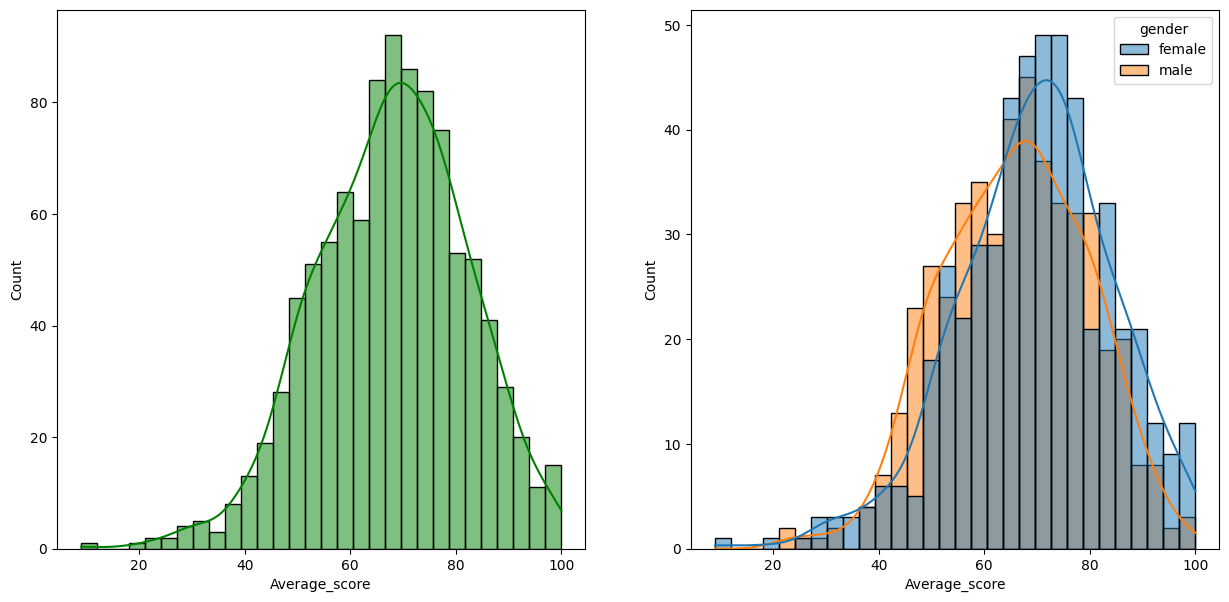

In [23]:
#data visualization
#visualize the average score distribution to make some conclusion

#qaverga score with respect to gender
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Average_score',bins=30,kde=True,hue='gender')
plt.show()

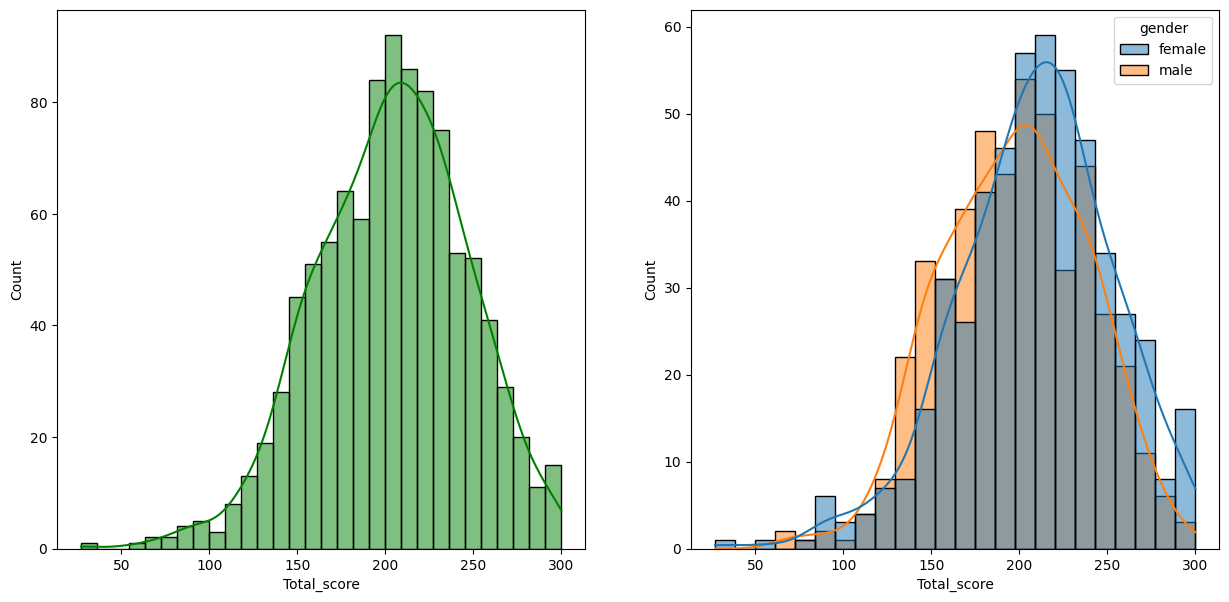

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Total_score',kde=True,hue='gender')
plt.show()


In [28]:
#female students have better marks than the boys

In [30]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='Average_score', ylabel='Count'>

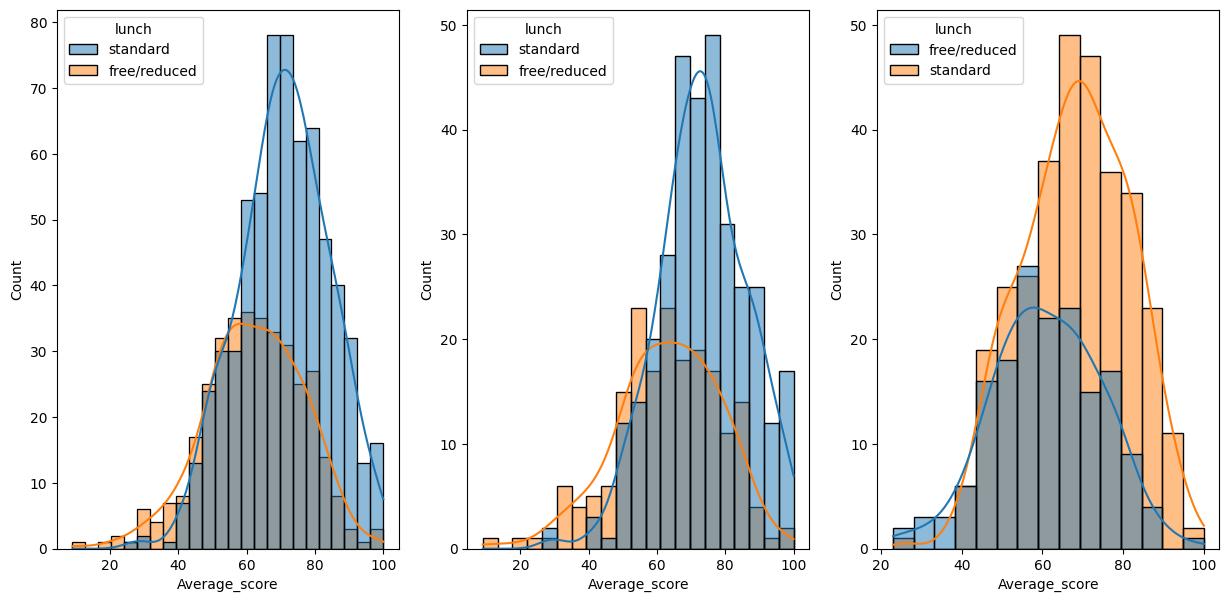

In [34]:
#draw visualization using lunch
fig,axs = plt.subplots(1,3,figsize=(15,7))
plt.subplot(131)
sns.histplot(data=data,x='Average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=data[data.gender=='female'],x="Average_score",hue='lunch',kde=True)
plt.subplot(133)
sns.histplot(data=data[data.gender=='male'],x="Average_score",hue='lunch',kde=True)


In [38]:
#standard lunch helps in to perform well in exams for boys and girls


In [39]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Visualization for gender


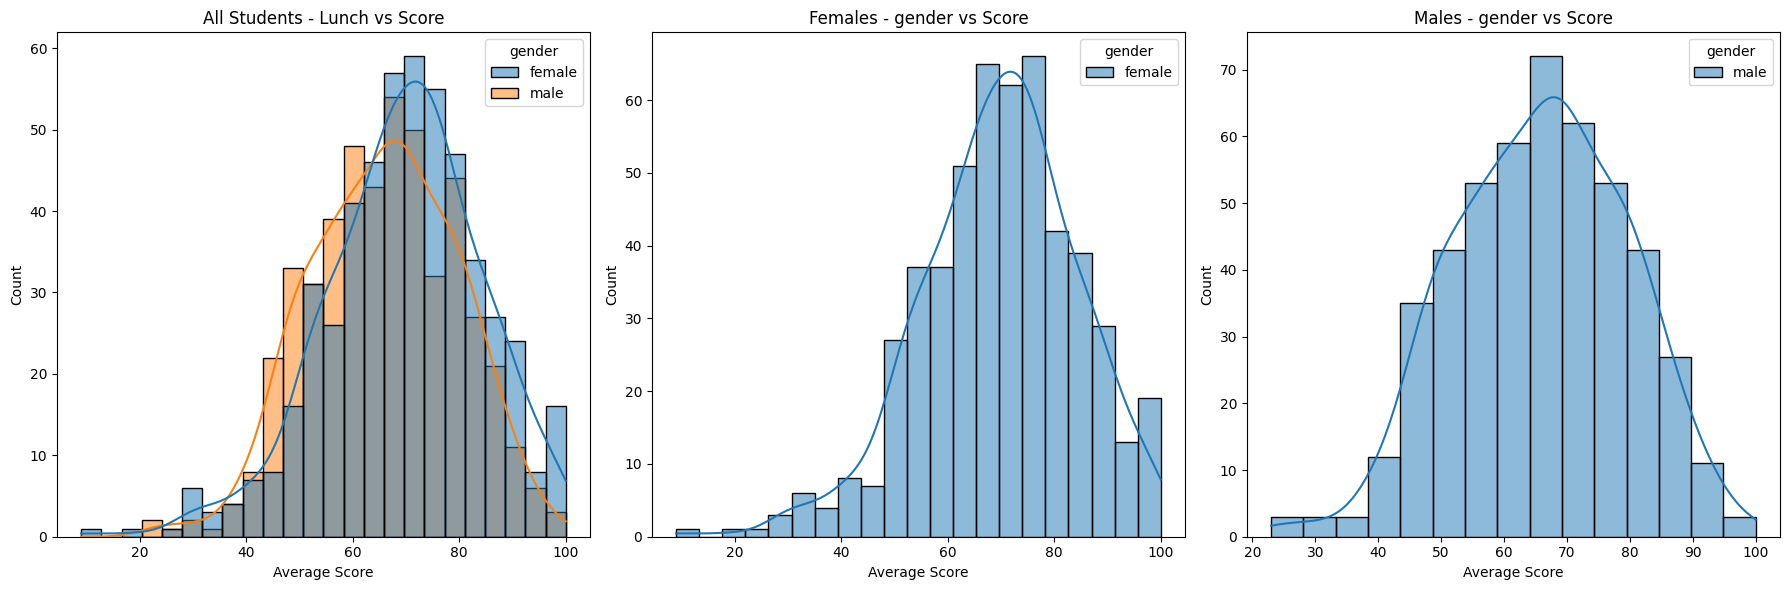

--------------------------------------------------
Visualization for race_ethnicity


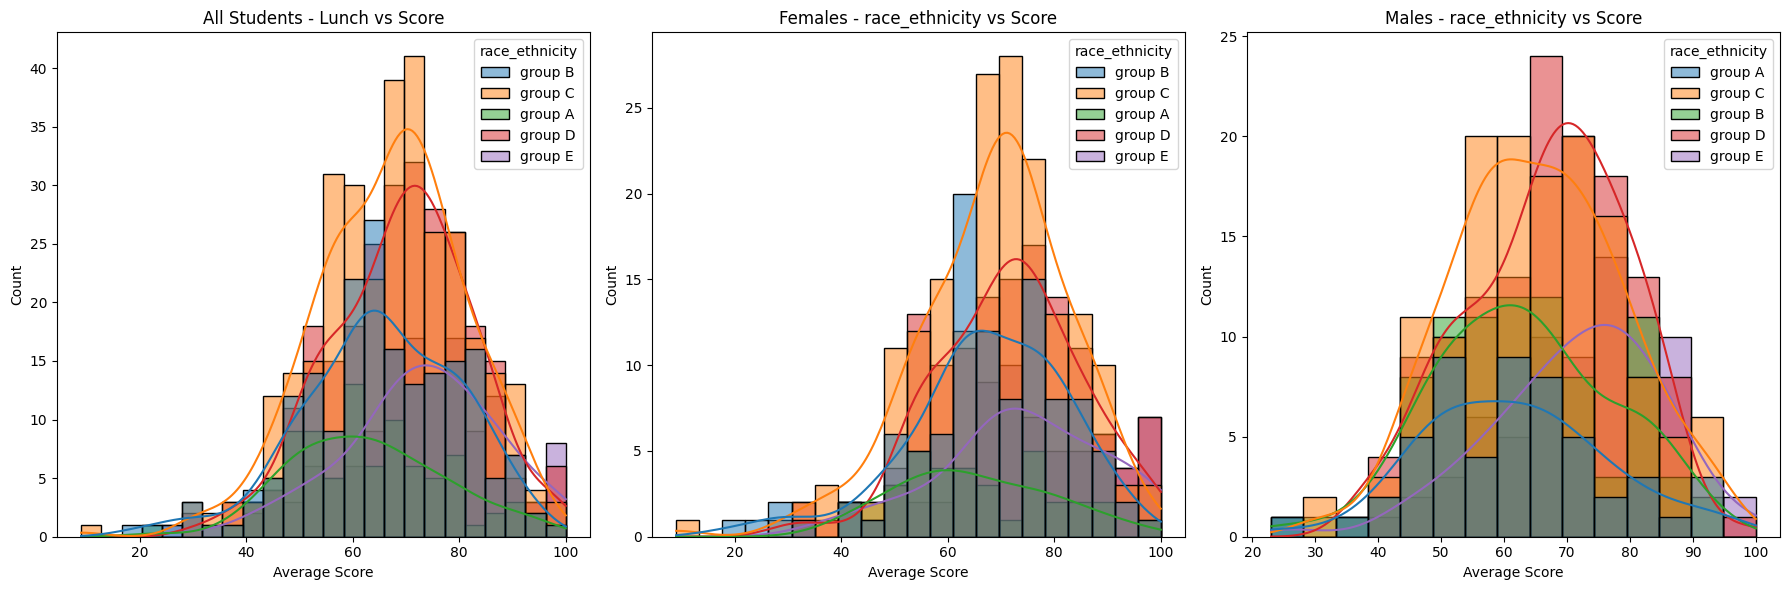

--------------------------------------------------
Visualization for parental_level_of_education


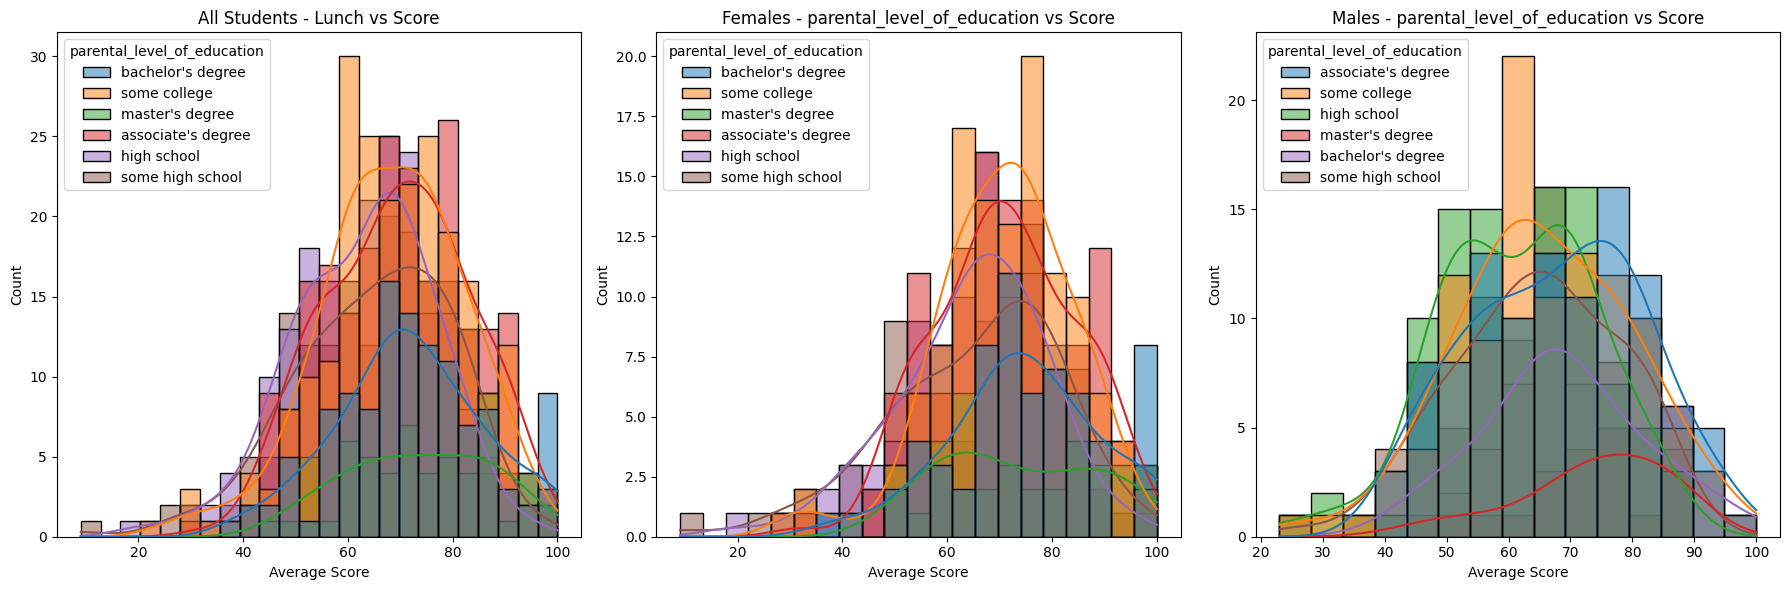

--------------------------------------------------
Visualization for lunch


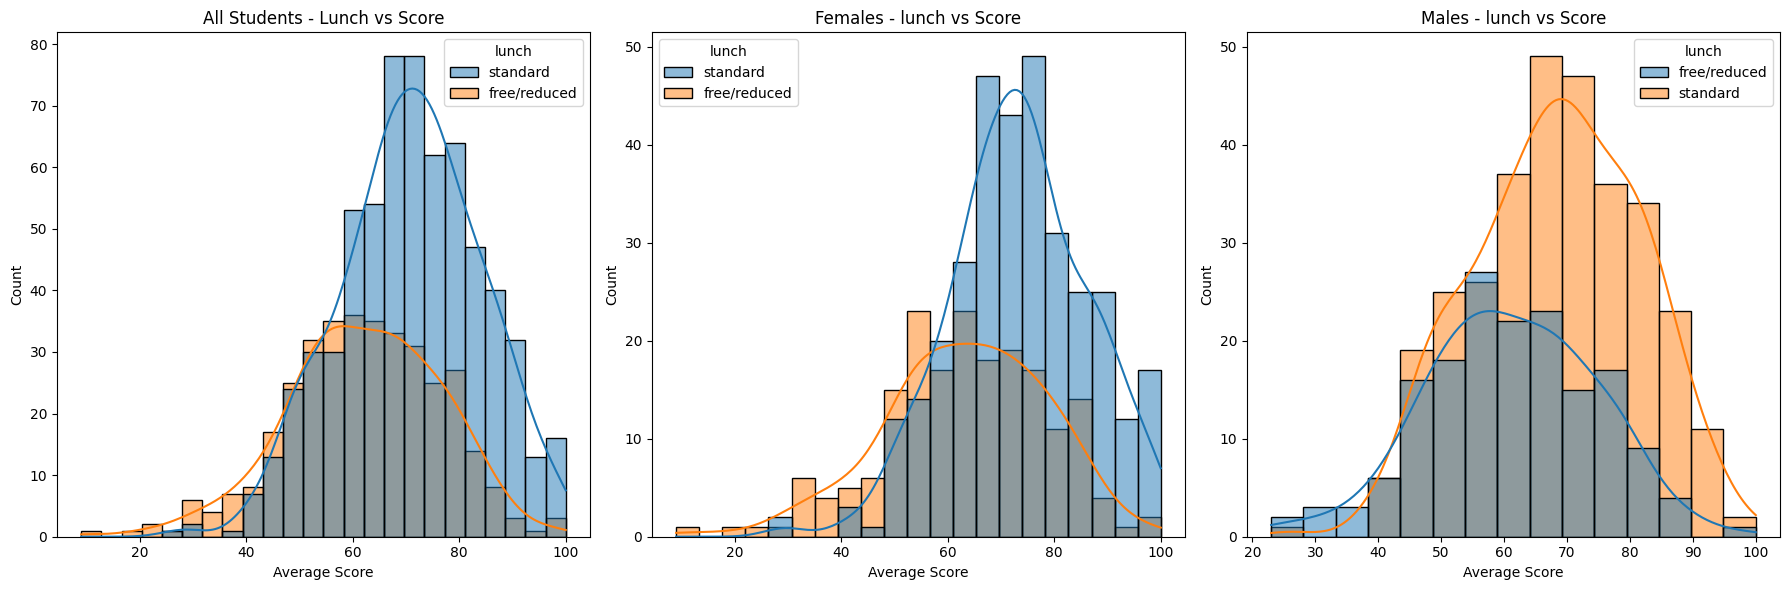

--------------------------------------------------
Visualization for test_preparation_course


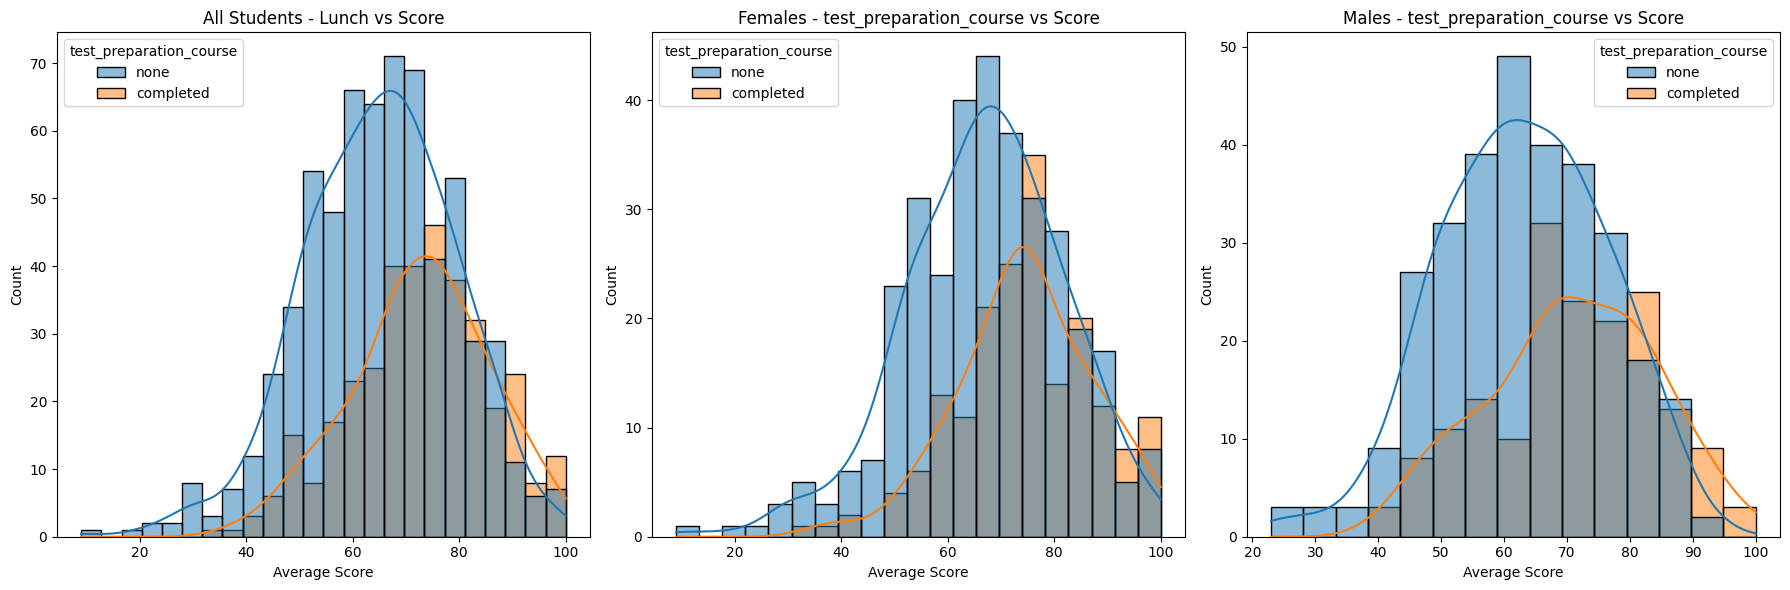

--------------------------------------------------


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_columns:
    print(f"Visualization for {col}")

    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Plot 1: All students
    sns.histplot(data=data, x='Average_score', kde=True, hue=col, ax=axs[0])
    axs[0].set_title(f'All Students - Lunch vs Score')
    axs[0].set_xlabel('Average Score')
    axs[0].set_ylabel('Count')

    # Plot 2: Female students
    sns.histplot(data=data[data.gender == 'female'], x='Average_score', kde=True, hue=col, ax=axs[1])
    axs[1].set_title(f'Females - {col} vs Score')
    axs[1].set_xlabel('Average Score')
    axs[1].set_ylabel('Count')

    # Plot 3: Male students
    sns.histplot(data=data[data.gender == 'male'], x='Average_score', kde=True, hue=col, ax=axs[2])
    axs[2].set_title(f'Males - {col} vs Score')
    axs[2].set_xlabel('Average Score')
    axs[2].set_ylabel('Count')

    plt.tight_layout()
    plt.show()
    print("-" * 50)


In [45]:
#from above plots
#parental education does not effect the marks of the student
#main is lunch that effect the marks
#- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [46]:
#distribution of marks of students in all 3 subjects

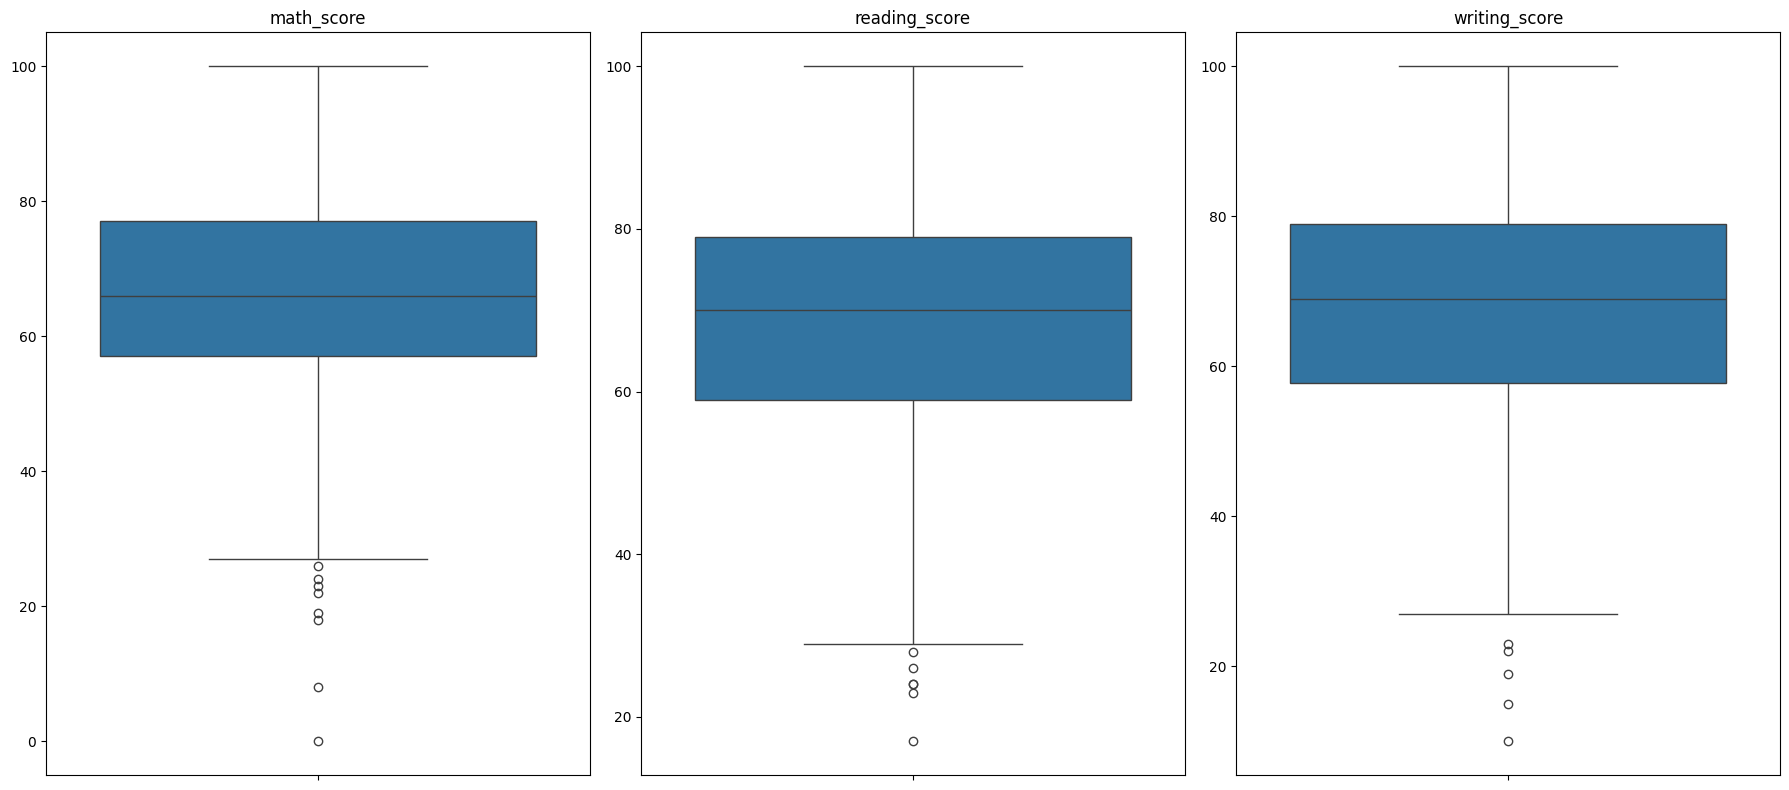

In [54]:
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(18,8))

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=data, y=col, ax=axs[i])
    axs[i].set_title(f'{col}')
    axs[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [59]:
data["gender"].value_counts().index

Index(['female', 'male'], dtype='object', name='gender')

In [55]:
#from above boxplots we can see that students score between 60-80 in all subjects

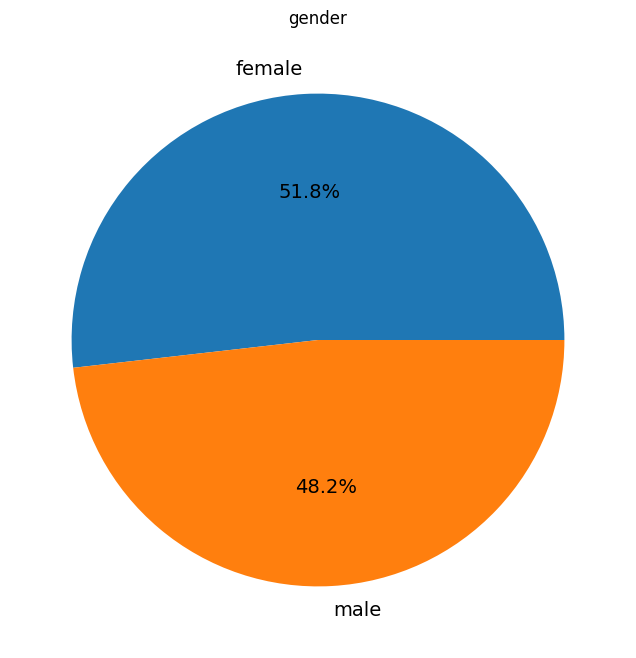

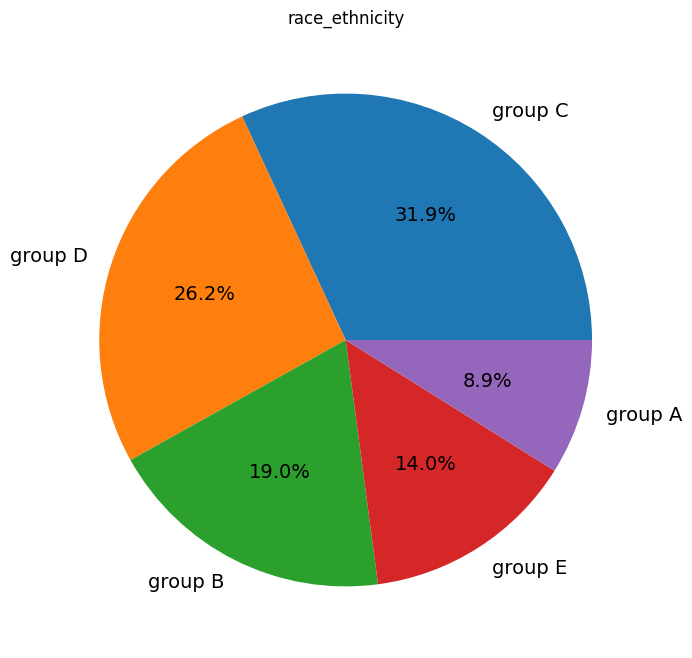

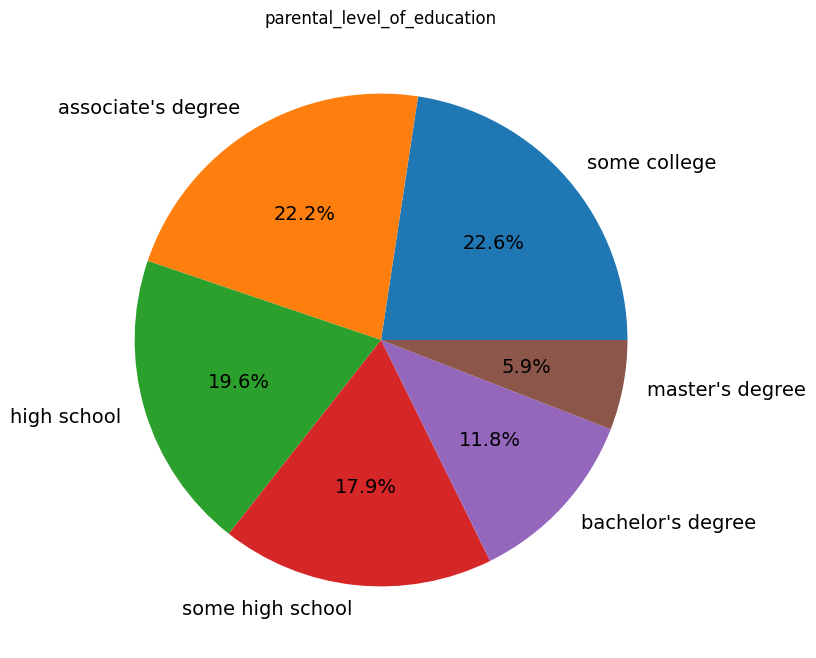

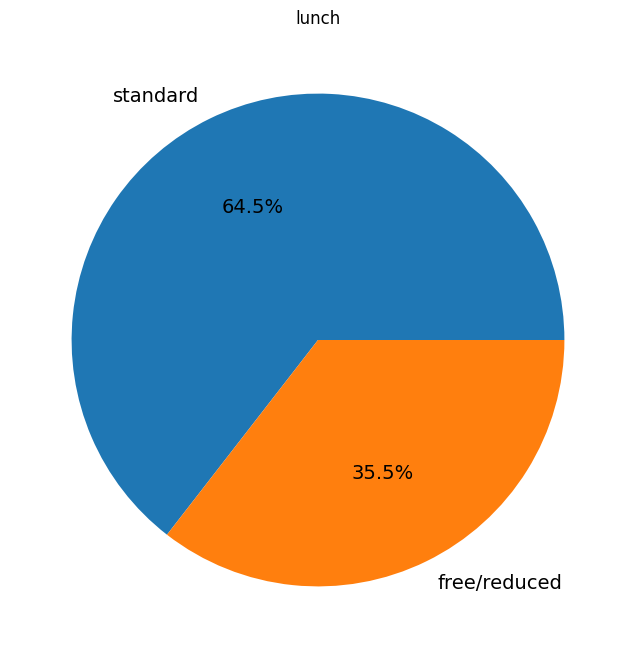

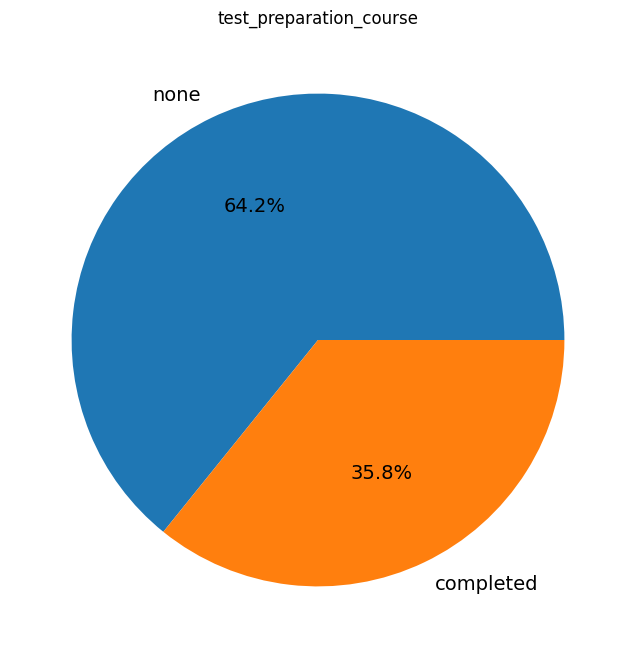

In [72]:
for i, col in enumerate(categorical_columns):
    plt.figure(figsize=(15,8))
    plt.pie(data[col].value_counts(),
            labels=data[col].value_counts().index,
            autopct='%1.1f%%',textprops={'fontsize': 14})
    plt.title(f'{col}')

plt.show()

In [67]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplot grid
fig = make_subplots(rows=1, cols=len(categorical_columns), specs=[[{'type':'domain'}]*len(categorical_columns)])

# Add a pie for each categorical column
for i, col in enumerate(categorical_columns):
    counts = data[col].value_counts()
    fig.add_trace(go.Pie(labels=counts.index, values=counts, name=col), row=1, col=i+1)

# Update layout
fig.update_layout(title_text="Pie Charts of Categorical Columns", height=500, width=300 * len(categorical_columns))

fig.show()


In [73]:
#####  Insights
#- Number of Male and Female students is almost equal
#- Number students are greatest in Group C
#- Number of students who have standard lunch are greater
#- Number of students who have not enrolled in any test preparation course is greater
#- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

In [77]:
gender_group = data.groupby('gender')[numerical_columns].mean()
gender_group

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [78]:
#on average females performed better but in maths male performed better

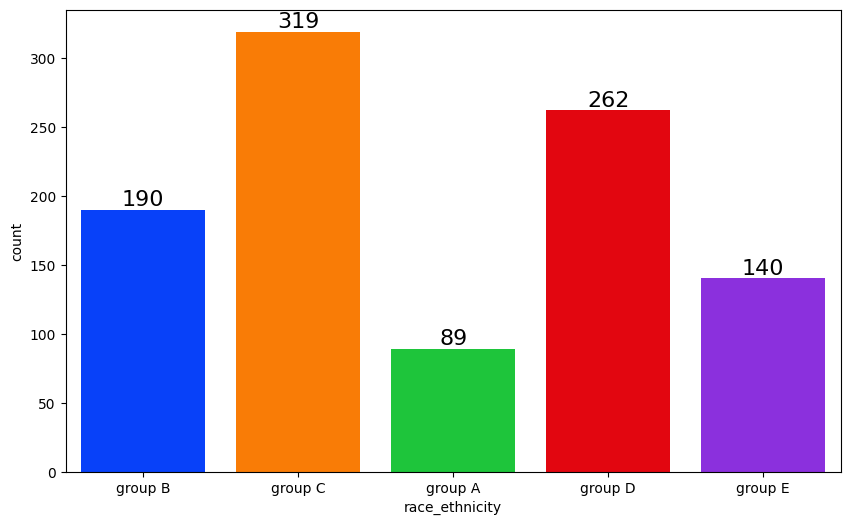

In [81]:

plt.figure(figsize=(10, 6))
sns.countplot(x="race_ethnicity", data=data, palette='bright', saturation=0.95)

# Get current axis
ax = plt.gca()

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, color='black', size=16)

In [84]:
race_group = data.groupby('race_ethnicity')[numerical_columns].mean()
race_group

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [86]:
#group E students scored highest marks
#group A students lowerst marks


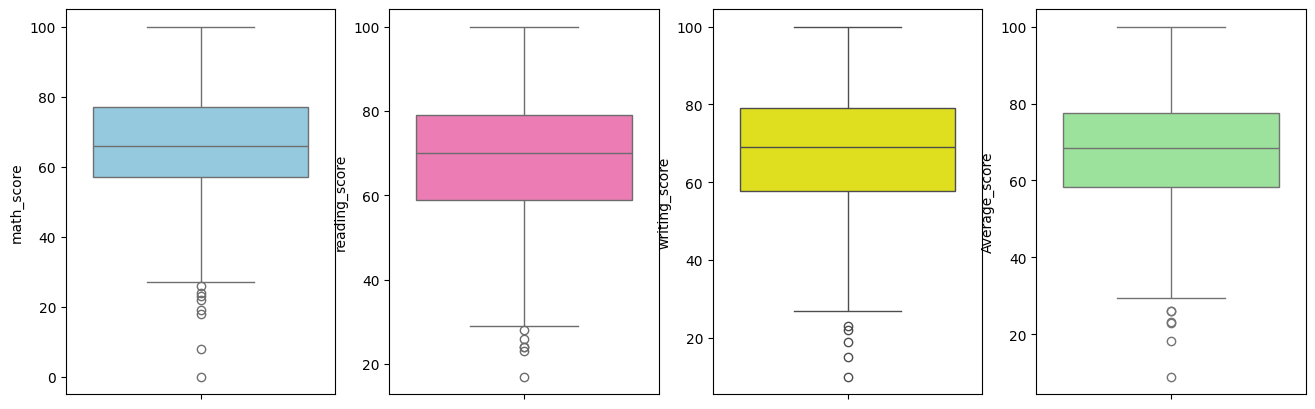

In [88]:
#checking outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['Average_score'],color='lightgreen')
plt.show()

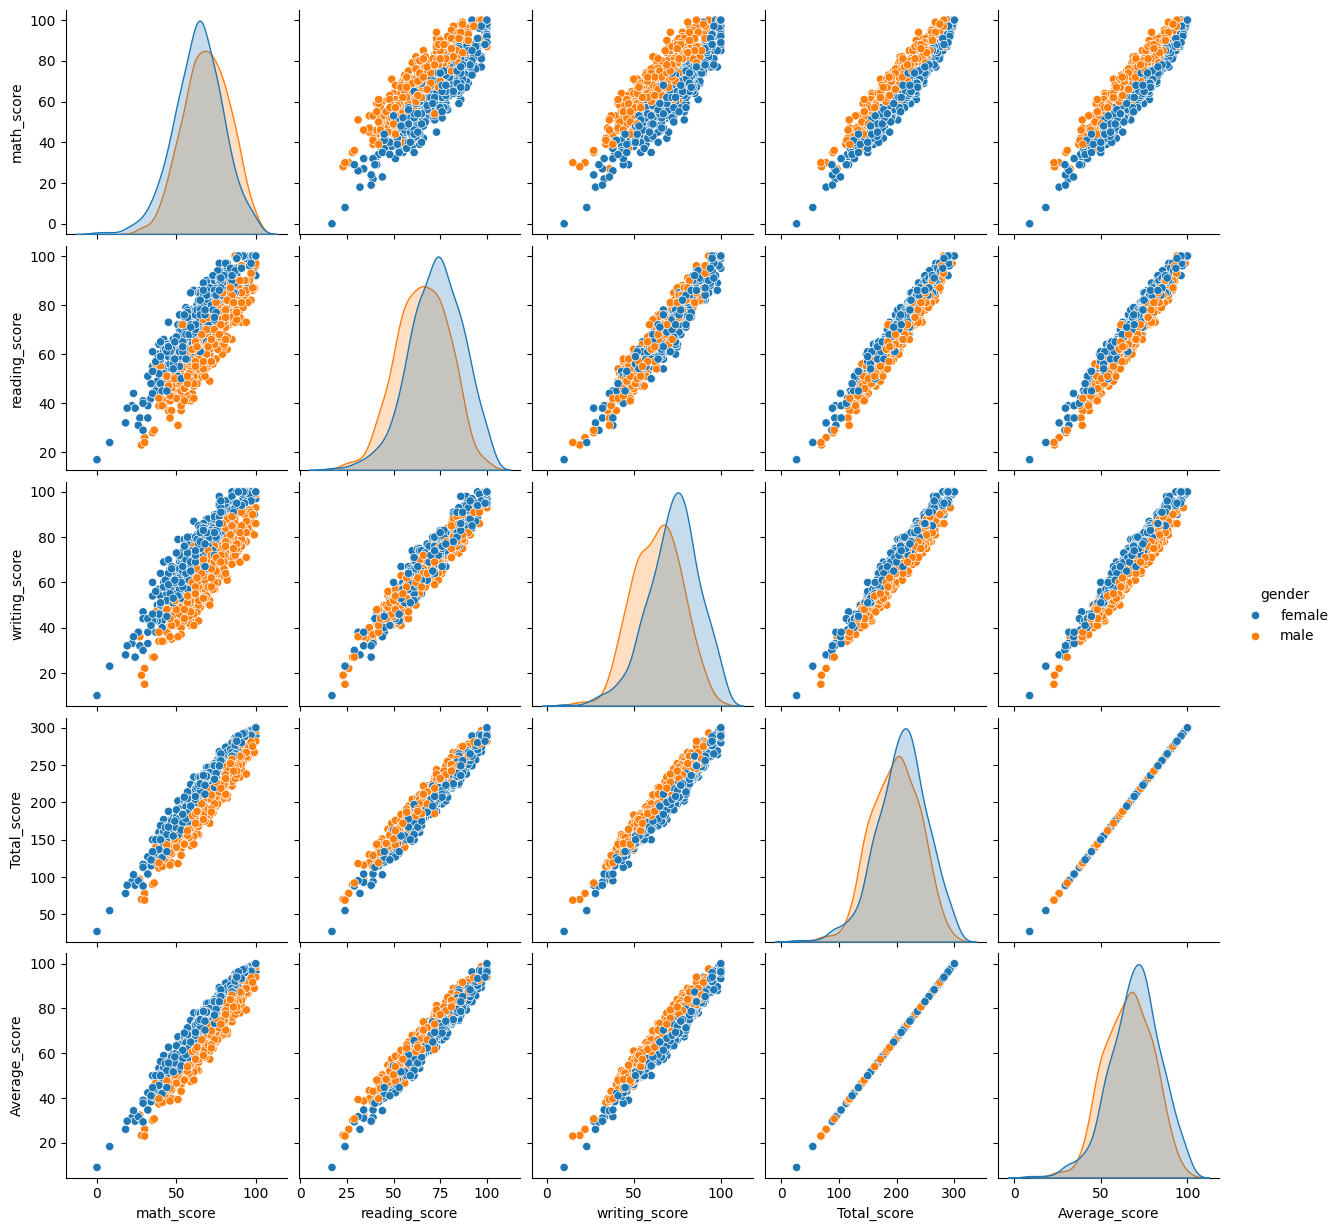

In [90]:
sns.pairplot(data,hue = 'gender')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.
- From the above plot it is clear that all the scores increase linearly with each other.